<a href="https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks for structual input



## Download the dataset

In [1]:
!wget https://download.pytorch.org/tutorial/data.zip

--2020-07-15 15:24:24--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.227.223.15, 13.227.223.75, 13.227.223.82, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.227.223.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.03s   

2020-07-15 15:24:24 (85.2 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [3]:
!head -n10 data/names/Russian.txt

Ababko
Abaev
Abagyan
Abaidulin
Abaidullin
Abaimoff
Abaimov
Abakeliya
Abakovsky
Abakshin


## Normalize name spellings in the dataset

In [4]:
import string
import unicodedata

# Alphabet [a-zA-Z .,;']
alphabet = set(string.ascii_letters + " .,;'")

def normalize(s):
    # Apply canonical decomposition, and ignore non-alphabet symbols.
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) if c in alphabet
        )

In [5]:
normalize('Ślusàrski')

'Slusarski'

In [6]:
import glob
import json
import os

data = []
srcs = glob.glob('data/names/*.txt')
for src in srcs:
    lang = os.path.basename(src)[:-4]
    for line in open(src):
        line = line.strip('\n')
        data.append((normalize(line), lang))
    
with open('names.json', 'w') as fo:
    json.dump(data, fo, indent=2)

In [7]:
!head -n10 names.json

[
  [
    "Abana",
    "Spanish"
  ],
  [
    "Abano",
    "Spanish"
  ],
  [


## Convert the string data into numerical data

In [8]:
def find_vocabulary(data):
    X, Y = set(), set()    
    for (x, y) in data:
        X.update(c for c in x)
        Y.add(y)
    return sorted(X), sorted(Y)

def build_mapping(items):
    M = {}
    for item in items:
        M.setdefault(item, len(M))
    return M

def convert_to_numeric_data(data, Xmap, Ymap):
    D = []
    for (x, y) in data:
        D.append(([Xmap[c] for c in x], Ymap[y]))
    return D    

import json
data = json.load(open('names.json'))

X, Y = find_vocabulary(data)
print(X)
print(Y)
Xmap = build_mapping(X)
Ymap = build_mapping(Y)

with open('names.data.json', 'w') as fo:
    json.dump(dict(
        data = convert_to_numeric_data(data, Xmap, Ymap),
        X = X,
        Y = Y,
        ), fo, indent=2)

[' ', "'", ',', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


In [9]:
!head -n20 names.data.json

{
  "data": [
    [
      [
        3,
        30,
        29,
        42,
        29
      ],
      16
    ],
    [
      [
        3,
        30,
        29,
        42,
        43
      ],


In [10]:
data = json.load(open('names.data.json'))

In [11]:
data['X']

[' ',
 "'",
 ',',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [12]:
data['Y']

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [13]:
data['data'][0]

[[3, 30, 29, 42, 29], 16]

In [14]:
''.join(data['X'][i] for i in data['data'][100][0])

'Espinosa'

In [15]:
data['data'][100][1]

16

In [16]:
data['Y'][data['data'][100][1]]

'Spanish'

## Install necessary modules

In [17]:
!pip install livelossplot

## Implementing RNN cells (states)

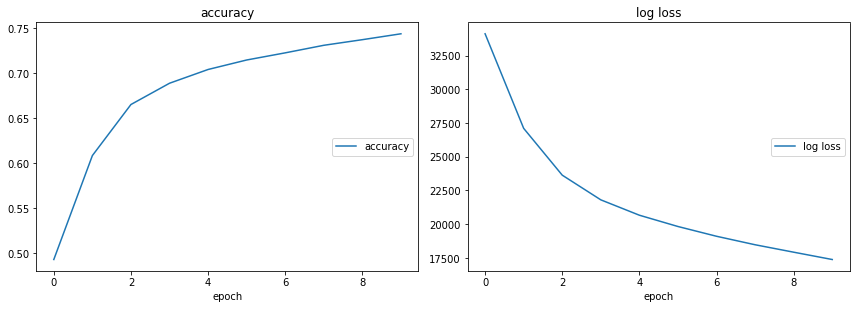

accuracy
	accuracy         	 (min:    0.493, max:    0.743, cur:    0.743)
log loss
	log loss         	 (min: 17376.371, max: 34125.248, cur: 17376.371)
Accuracy: 0.7434 (train)


In [18]:
import json
import random
import torch
import torch.nn as nn
import torch.optim as optim
from livelossplot import PlotLosses

class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNCell, self).__init__()
        
        self.hidden_size = hidden_size
        self.f = nn.Tanh()
        self.hi = nn.Linear(input_size + hidden_size, hidden_size)
        self.oh = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        new_hidden = self.f(self.hi(torch.cat((input, hidden), 0)))
        new_output = self.oh(new_hidden)
        return new_output, new_hidden
    
    def initHidden(self):
        return torch.zeros(self.hidden_size)
    
def x_to_tensor(x, input_size):
    tensor = torch.zeros(len(x), input_size, dtype=torch.float)
    for i, j in enumerate(x):
        tensor[i][j] = 1
    return tensor

def y_to_tensor(y):
    tensor = torch.zeros(1, dtype=torch.long)
    tensor[0] = y
    return tensor

data = json.load(open('names.data.json'))
dataset = data['data']
input_size = len(data['X'])
output_size = len(data['Y'])

model = RNNCell(input_size, 128, output_size)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

liveloss = PlotLosses()
for t in range(10):
    train_loss = 0.
    num_train_correct = 0
    random.shuffle(dataset)
    
    # Training loop for every instance.
    for (x, y) in dataset:
        # Convert a training instance into tensors in place.
        x = x_to_tensor(x, input_size)
        y = y_to_tensor(y)
        
        # Recurrent Neural Network
        hidden = model.initHidden()
        for xt in x:
            output, hidden = model(xt, hidden)
                
        # Make predictions with the current parameters.
        y_pred = output.view(1, -1)  # Reshape the output: (18) -> (1, 18)
        _, predicted = torch.max(y_pred.data, 1)
        num_train_correct += (predicted == y).sum().item()
        
        # Compute the loss value.
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # Update the parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
    # Visualize accuracy values on the training set.
    num_train_correct /= float(len(dataset))
    liveloss.update({
        'log loss': train_loss,
        'accuracy': num_train_correct,
    })
    liveloss.draw()
    
print('Accuracy: {:.4f} (train)'.format(num_train_correct))

## Using `nn.RNN` module

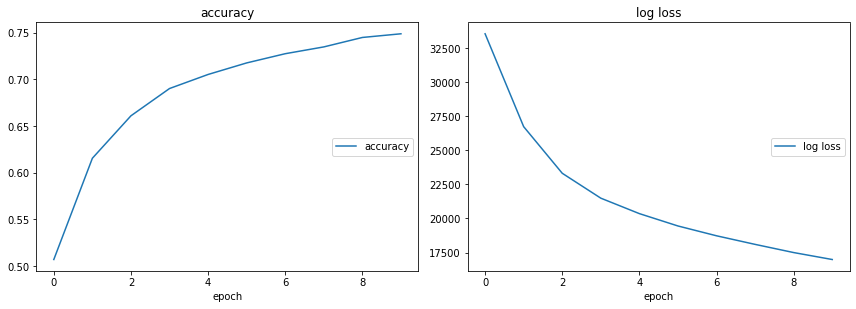

accuracy
	accuracy         	 (min:    0.507, max:    0.749, cur:    0.749)
log loss
	log loss         	 (min: 16986.062, max: 33556.280, cur: 16986.062)
Accuracy: 0.7487 (train)


In [19]:
import json
import random
import torch
import torch.nn as nn
import torch.optim as optim
from livelossplot import PlotLosses

class SequenceRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SequenceRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        output, hidden = self.rnn(input, hidden)
        output = self.fc(output[-1])
        return output
    
    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
def x_to_tensor(x, input_size):
    tensor = torch.zeros(len(x), 1, input_size, dtype=torch.float)
    for i, j in enumerate(x):
        tensor[i][0][j] = 1   # (T, batch, input_dim)
    return tensor

def y_to_tensor(y):
    tensor = torch.zeros(1, dtype=torch.long)
    tensor[0] = y
    return tensor

data = json.load(open('names.data.json'))
dataset = data['data']
input_size = len(data['X'])
output_size = len(data['Y'])

model = SequenceRNN(input_size, 128, output_size)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

liveloss = PlotLosses()
for t in range(10):
    train_loss = 0.
    num_train_correct = 0
    random.shuffle(dataset)
    
    # Training loop for every instance.
    for (x, y) in dataset:
        # Convert a training instance into tensors in place.
        x = x_to_tensor(x, input_size)
        y = y_to_tensor(y)
        
        # Make predictions with the current parameters.
        y_pred = model(x, model.initHidden())
        _, predicted = torch.max(y_pred.data, 1)
        num_train_correct += (predicted == y).sum().item()
        
        # Compute the loss value.
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # Update the parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Visualize accuracy values on the training set.
    num_train_correct /= float(len(dataset))
    liveloss.update({
        'log loss': train_loss,
        'accuracy': num_train_correct,
    })
    liveloss.draw()
    
print('Accuracy: {:.4f} (train)'.format(num_train_correct))

### Predict a nationality of a name by using the trained model

In [20]:
def predict(name):
    x = []
    for c in name:
        x.append(data['X'].index(c))
    x = x_to_tensor(x, len(data['X']))
    hidden = model.initHidden()
    y_pred = nn.Softmax(dim=-1)(model(x, hidden))
   
    scores = []
    for index, lang in enumerate(data['Y']):
        scores.append((lang, float(y_pred[0][index])))
        
    return sorted(scores, key=lambda x: x[1], reverse=True)

In [21]:
predict('Sato')

[('Japanese', 0.6929662823677063),
 ('Italian', 0.0777701660990715),
 ('Chinese', 0.05028809234499931),
 ('Korean', 0.024616673588752747),
 ('Vietnamese', 0.02416541613638401),
 ('German', 0.022809140384197235),
 ('Russian', 0.015709877014160156),
 ('Spanish', 0.01496911607682705),
 ('Irish', 0.013502505607903004),
 ('Czech', 0.010937624610960484),
 ('English', 0.010854950174689293),
 ('Dutch', 0.009302856400609016),
 ('Portuguese', 0.008285198360681534),
 ('Polish', 0.006108949892222881),
 ('Scottish', 0.0060310279950499535),
 ('Arabic', 0.00596021069213748),
 ('French', 0.005191550124436617),
 ('Greek', 0.0005303696962073445)]

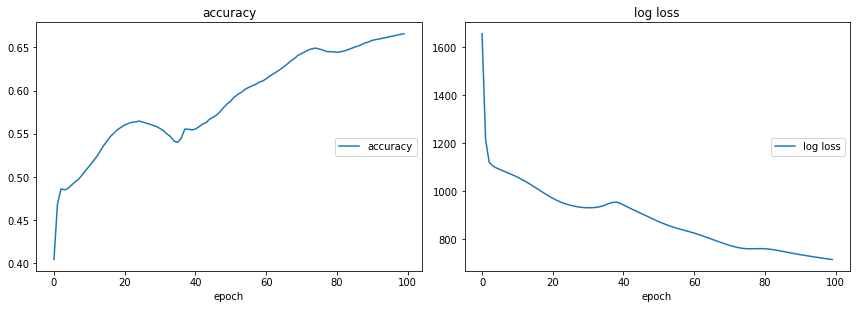

accuracy
	accuracy         	 (min:    0.404, max:    0.666, cur:    0.666)
log loss
	log loss         	 (min:  716.589, max: 1655.089, cur:  716.589)
Accuracy: 0.6657 (train)


In [22]:
import json
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from livelossplot import PlotLosses

class MinibatchSequenceRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinibatchSequenceRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def last_timestep(self, unpacked, lengths):
        idx = (lengths-1).view(-1, 1).expand(
            unpacked.size(0), unpacked.size(2)).unsqueeze(1)
        return unpacked.gather(1, idx).squeeze()
    
    def forward(self, input, hidden, l):
        input = nn.utils.rnn.pack_padded_sequence(input, l, batch_first=True)
        output, hidden = self.rnn(input, hidden)
        output, _ = nn.utils.rnn.pad_packed_sequence(output, batch_first=True)
        output = self.last_timestep(output, l)
        output = self.fc(output)
        return output
    
    def initHidden(self, batch_size=1):
        return torch.zeros(1, batch_size, self.hidden_size)
    
def create_dataset(data, X, Y):
    # Sort the data by sequence length (long to short)
    data.sort(key=lambda instance: len(instance[0]), reverse=True)
    
    input_size = len(X)
    output_size = len(Y)
    max_length = len(data[0][0])
    num_instances = len(data)
    
    xt = torch.zeros(num_instances, max_length, input_size, dtype=torch.float)
    yt = torch.zeros(num_instances, dtype=torch.long)
    lt = torch.zeros(num_instances, dtype=torch.long)
                    
    for i, (x, y) in enumerate(data):
        for t, v in enumerate(x):
            xt[i][t][v] = 1
        yt[i] = y
        lt[i] = len(x)
    return TensorDataset(xt, yt, lt)

batch_size = 32
data = json.load(open('names.data.json'))
train_set = create_dataset(data['data'], data['X'], data['Y'])
train_loader = DataLoader(train_set, batch_size=batch_size)
input_size = len(data['X'])
output_size = len(data['Y'])

model = MinibatchSequenceRNN(input_size, 128, output_size)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

liveloss = PlotLosses()
for t in range(100):
    train_loss = 0.
    num_train_correct = 0
    
    # Training loop for mini-batches
    for batch_idx, (x, y, l) in enumerate(train_loader):
        this_batch_size = len(l)
        
        # Make predictions with the current parameters.
        hidden = model.initHidden(this_batch_size)
        y_pred = model(x, hidden, l)[:this_batch_size]
        _, predicted = torch.max(y_pred.data, 1)
        num_train_correct += (predicted == y).sum().item()
        
        # Compute the loss value.
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # Update the parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Visualize accuracy values on the training set.
    num_train_correct /= float(len(dataset))
    liveloss.update({
        'log loss': train_loss,
        'accuracy': num_train_correct,
    })
    liveloss.draw()
    
print('Accuracy: {:.4f} (train)'.format(num_train_correct))